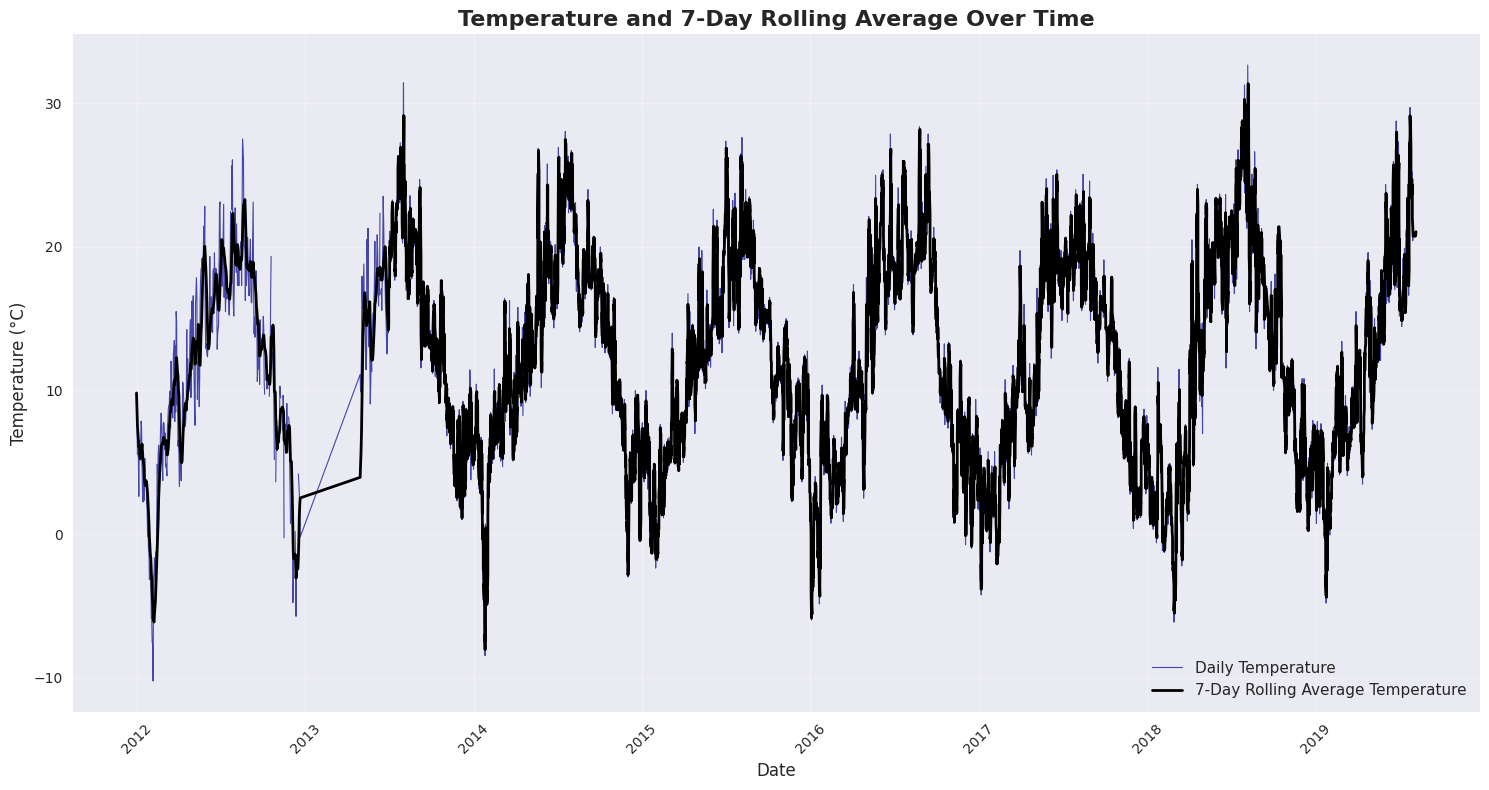


Temperature Statistics:
Daily Temperature - Mean: 12.01°C, Std: 7.20°C
7-Day Rolling Avg - Mean: 12.01°C, Std: 7.08°C
Data range: 2012-01-01 to 2019-08-07
Number of data points: 11596


In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set style for better-looking plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Load the data
df = pd.read_csv('../processed_data/combined_data_final.csv')

# Convert Datum to datetime
df['Datum'] = pd.to_datetime(df['Datum'])

# Remove rows where both temperature columns are NaN
df_temp = df.dropna(subset=['Temperatur', 'Temperatur_7day_rolling'], how='all')

# Create the visualization
fig, ax = plt.subplots(figsize=(15, 8))

# Plot both temperature variables
ax.plot(df_temp['Datum'], df_temp['Temperatur'], 
        label='Daily Temperature', alpha=0.7, linewidth=0.8, color='darkblue')
ax.plot(df_temp['Datum'], df_temp['Temperatur_7day_rolling'], 
        label='7-Day Rolling Average Temperature', linewidth=2, color='black')

# Customize the plot
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Temperature (°C)', fontsize=12)
ax.set_title('Temperature and 7-Day Rolling Average Over Time', fontsize=16, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

# Print some basic statistics
print("\nTemperature Statistics:")
print(f"Daily Temperature - Mean: {df_temp['Temperatur'].mean():.2f}°C, Std: {df_temp['Temperatur'].std():.2f}°C")
print(f"7-Day Rolling Avg - Mean: {df_temp['Temperatur_7day_rolling'].mean():.2f}°C, Std: {df_temp['Temperatur_7day_rolling'].std():.2f}°C")
print(f"Data range: {df_temp['Datum'].min().strftime('%Y-%m-%d')} to {df_temp['Datum'].max().strftime('%Y-%m-%d')}")
print(f"Number of data points: {len(df_temp)}")

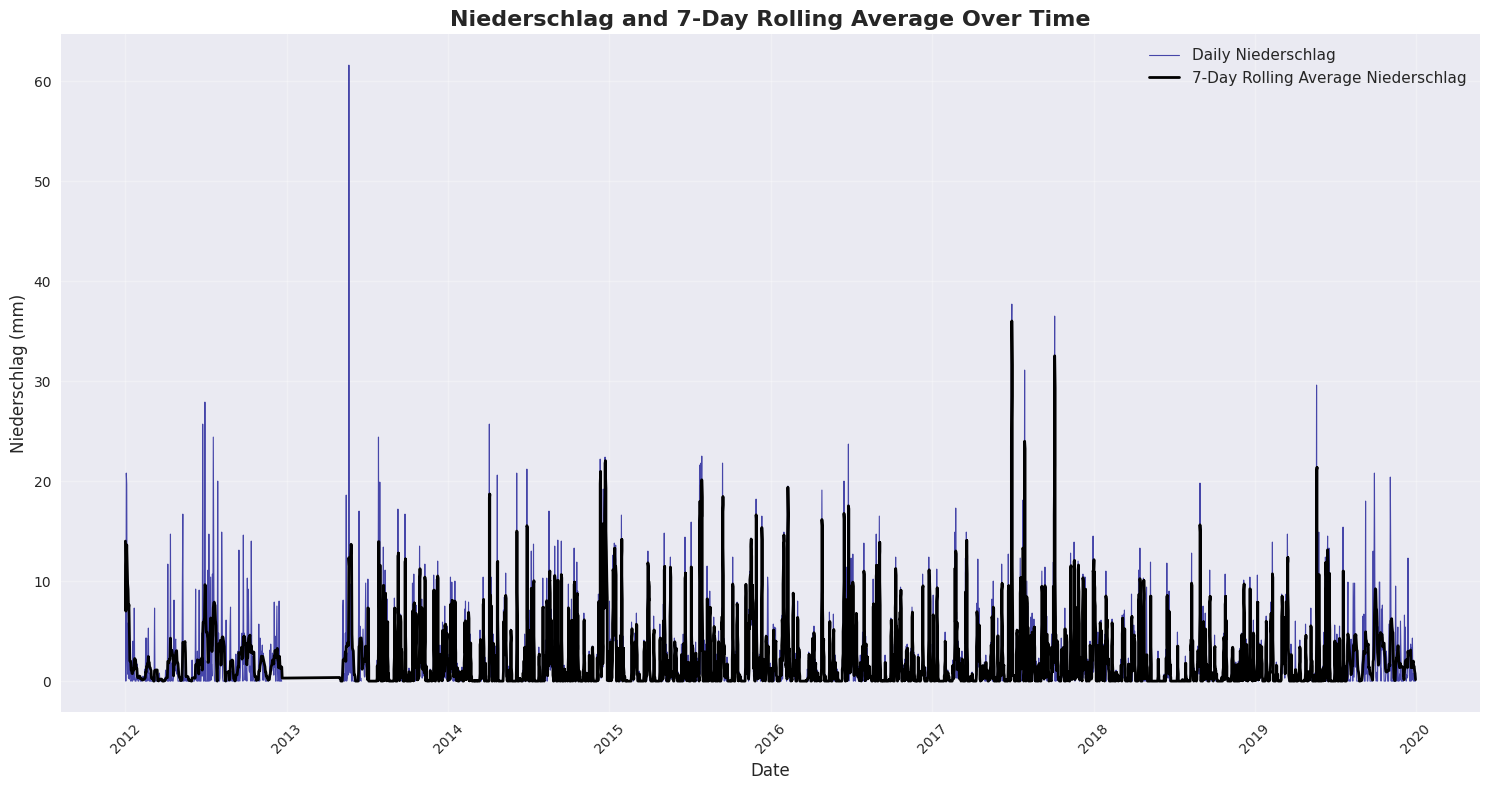


Niederschlag Statistics:
Daily Niederschlag - Mean: 2.05 mm, Std: 4.08 mm
7-Day Rolling Avg - Mean: 2.05 mm, Std: 3.25 mm
Data range: 2012-01-01 to 2019-12-31
Number of data points: 11782


In [31]:
# Remove rows where both Niederschlag columns are NaN
df_temp = df.dropna(subset=['Niederschlag', 'Niederschlag_7day_rolling'], how='all')

# Create the visualization
fig, ax = plt.subplots(figsize=(15, 8))

# Plot both temperature variables
ax.plot(df_temp['Datum'], df_temp['Niederschlag'], 
        label='Daily Niederschlag', alpha=0.7, linewidth=0.8, color='darkblue')
ax.plot(df_temp['Datum'], df_temp['Niederschlag_7day_rolling'], 
        label='7-Day Rolling Average Niederschlag', linewidth=2, color='black')

# Customize the plot
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Niederschlag (mm)', fontsize=12)
ax.set_title('Niederschlag and 7-Day Rolling Average Over Time', fontsize=16, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

# Print some basic statistics
print("\nNiederschlag Statistics:")
print(f"Daily Niederschlag - Mean: {df_temp['Niederschlag'].mean():.2f} mm, Std: {df_temp['Niederschlag'].std():.2f} mm")
print(f"7-Day Rolling Avg - Mean: {df_temp['Niederschlag_7day_rolling'].mean():.2f} mm, Std: {df_temp['Niederschlag_7day_rolling'].std():.2f} mm")
print(f"Data range: {df_temp['Datum'].min().strftime('%Y-%m-%d')} to {df_temp['Datum'].max().strftime('%Y-%m-%d')}")
print(f"Number of data points: {len(df_temp)}")

--- Generating Weather Category Histogram ---


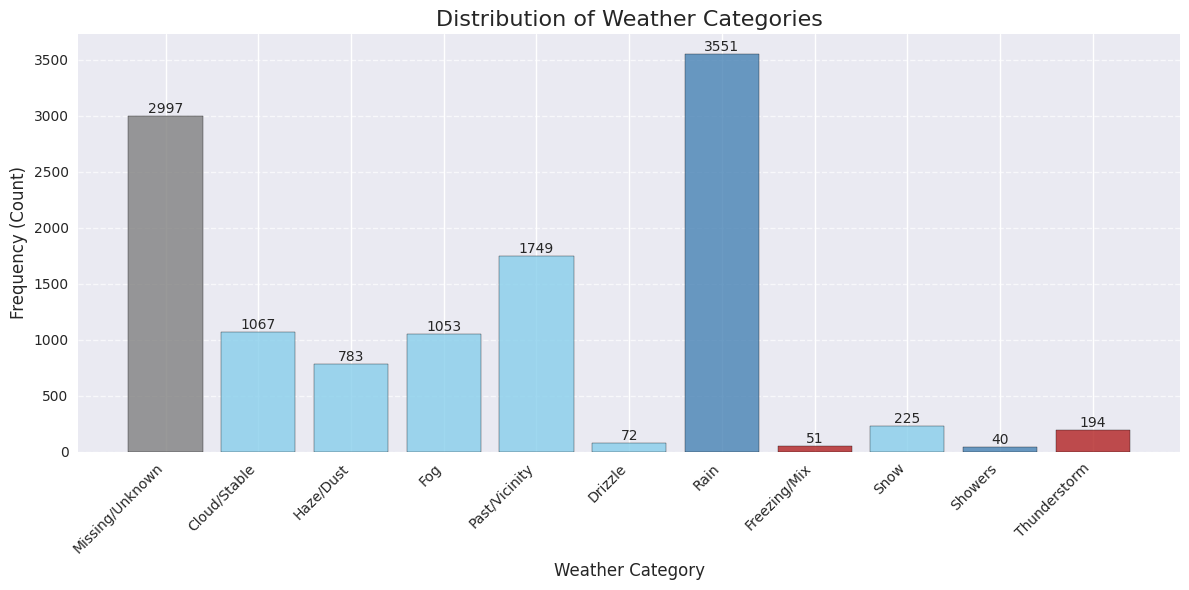

In [32]:
import calendar
print("--- Generating Weather Category Histogram ---")

# 1. Define the Categories and their Names (for the X-axis labels)
categories = [
    (-1, "Missing/Unknown"),
    (1, "Cloud/Stable"),
    (2, "Haze/Dust"),
    (3, "Fog"),
    (4, "Past/Vicinity"),
    (5, "Drizzle"),
    (6, "Rain"),
    (7, "Freezing/Mix"),
    (8, "Snow"),
    (9, "Showers"),
    (10, "Thunderstorm")
]

# 2. Calculate the counts by summing the One-Hot columns
# We loop through our list and sum the corresponding column in the dataframe
counts = []
labels = []
colors = []

for cat_id, cat_name in categories:
    col_name = f"W_Cat_{cat_id}"
    
    # Check if column exists (just in case)
    if col_name in df.columns:
        count = df[col_name].sum()
        counts.append(count)
        labels.append(cat_name)
        
        # Color logic: Gray for missing, Blue for standard, Red for severe
        if cat_id == -1: colors.append('gray')
        elif cat_id in [7, 10]: colors.append('firebrick') # Severe
        elif cat_id in [6, 9]: colors.append('steelblue')  # Rain/Showers
        else: colors.append('skyblue')
    else:
        # If column is missing, count is 0
        counts.append(0)
        labels.append(cat_name)
        colors.append('lightgray')

# 3. Create the Plot
plt.figure(figsize=(12, 6))

# Create bar chart
bars = plt.bar(labels, counts, color=colors, edgecolor='black', alpha=0.8)

# 4. Styling
plt.title('Distribution of Weather Categories', fontsize=16)
plt.xlabel('Weather Category', fontsize=12)
plt.ylabel('Frequency (Count)', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rotate labels so they don't overlap
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 5. Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    if height > 0:
        plt.text(bar.get_x() + bar.get_width()/2., height,
                 f'{int(height)}',
                 ha='center', va='bottom', fontsize=10)

plt.tight_layout() # Fix layout so labels aren't cut off
plt.show()

--- Generating Monthly Weather Trends from 'Datum' ---


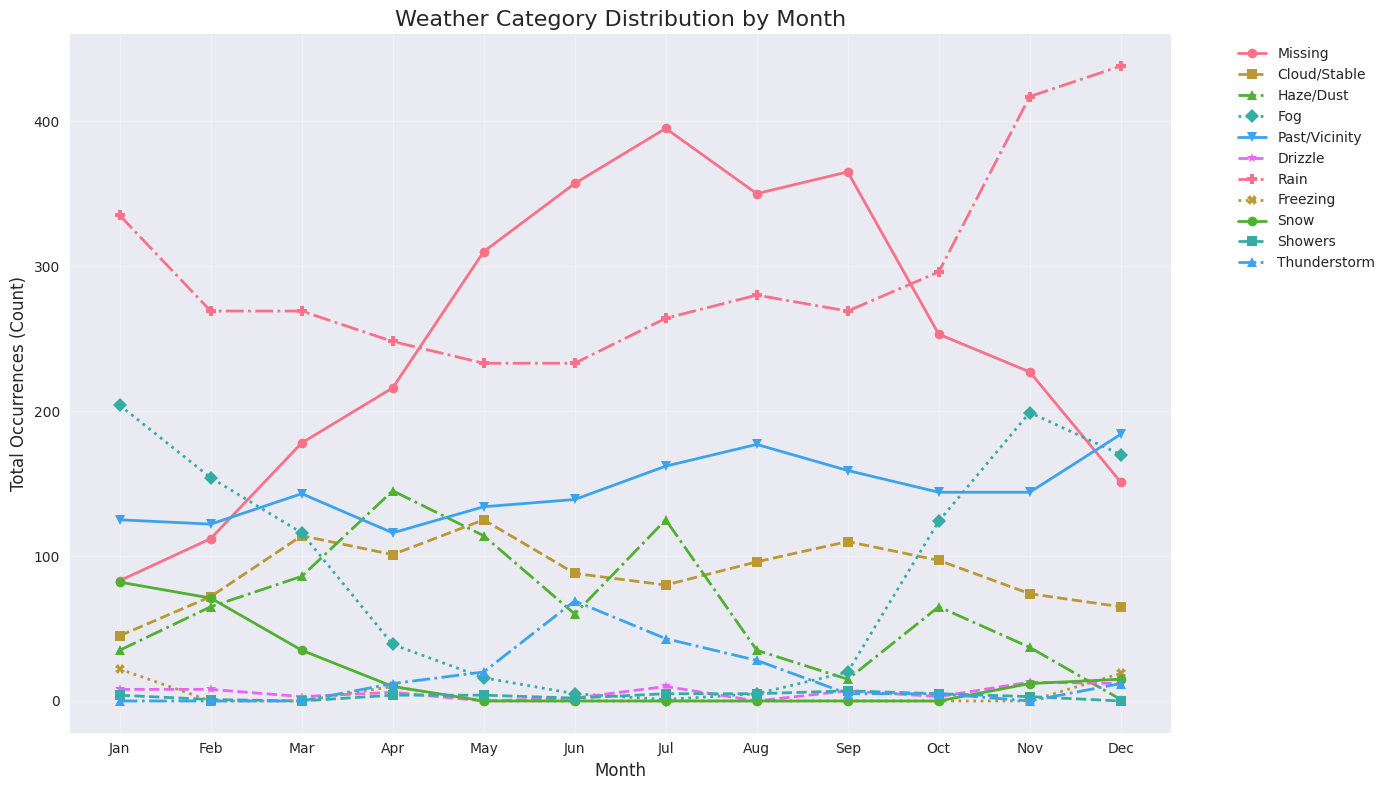

In [33]:

print("--- Generating Monthly Weather Trends from 'Datum' ---")

# 1. Convert 'Datum' to datetime objects
# This ensures pandas understands the string "2023-01-01" as a date.
df['Datum'] = pd.to_datetime(df['Datum'])

# 2. Extract the Month
# We use the .dt accessor to grab the month number (1=Jan, 12=Dec)
df['Month'] = df['Datum'].dt.month

# 3. Identify your Weather Columns
# We look for all columns starting with 'W_Cat_'
weather_cols = [c for c in df.columns if 'W_Cat_' in c]

if not weather_cols:
    print("Error: No 'W_Cat_' columns found. Did you run the encoding step?")
else:
    # 4. Group by Month and Sum
    monthly_counts = df.groupby('Month')[weather_cols].sum()

    # 5. Rename columns for the Legend (Optional but nicer)
    category_names = {
        'W_Cat_-1': "Missing",
        'W_Cat_1': "Cloud/Stable",
        'W_Cat_2': "Haze/Dust",
        'W_Cat_3': "Fog",
        'W_Cat_4': "Past/Vicinity",
        'W_Cat_5': "Drizzle",
        'W_Cat_6': "Rain",
        'W_Cat_7': "Freezing",
        'W_Cat_8': "Snow",
        'W_Cat_9': "Showers",
        'W_Cat_10': "Thunderstorm"
    }
    monthly_counts.rename(columns=category_names, inplace=True)

    # 6. Plotting
    plt.figure(figsize=(14, 8))

    styles = ['-', '--', '-.', ':'] 
    markers = ['o', 's', '^', 'D', 'v', '*', 'P', 'X'] 

    for i, column in enumerate(monthly_counts.columns):
        # Only plot if the category actually exists in the data
        if monthly_counts[column].sum() > 0:
            plt.plot(monthly_counts.index, 
                     monthly_counts[column], 
                     label=column,
                     linewidth=2,
                     marker=markers[i % len(markers)],
                     linestyle=styles[i % len(styles)])

    # Formatting
    plt.title('Weather Category Distribution by Month', fontsize=16)
    plt.xlabel('Month', fontsize=12)
    plt.ylabel('Total Occurrences (Count)', fontsize=12)
    
    # Map 1-12 to Jan-Dec
    plt.xticks(range(1, 13), calendar.month_abbr[1:13]) 
    
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()

    plt.show()

--- Analyzing Average Umsatz by Temperature Categories per Warengruppe ---
--- with Confidence Intervals and Statistical Significance ---

Found 7 Warengruppen: [np.float64(1.0), np.float64(2.0), np.float64(3.0), np.float64(4.0), np.float64(5.0), np.float64(6.0), np.float64(nan)]

AVERAGE UMSATZ BY TEMPERATURE CATEGORY PER WARENGRUPPE

────────────────────────────────────────────────────────────────────────────────
Warengruppe 1.0
────────────────────────────────────────────────────────────────────────────────
  Cold Temperature:
    Mean: €122.51
    95% CI: [€117.51, €127.52]
    n = 338

  Normal Temperature:
    Mean: €122.76
    95% CI: [€120.49, €125.02]
    n = 1143

  Warm Temperature:
    Mean: €119.69
    95% CI: [€115.68, €123.70]
    n = 338

────────────────────────────────────────────────────────────────────────────────
Warengruppe 2.0
────────────────────────────────────────────────────────────────────────────────
  Cold Temperature:
    Mean: €387.45
    95% CI: [€372.0

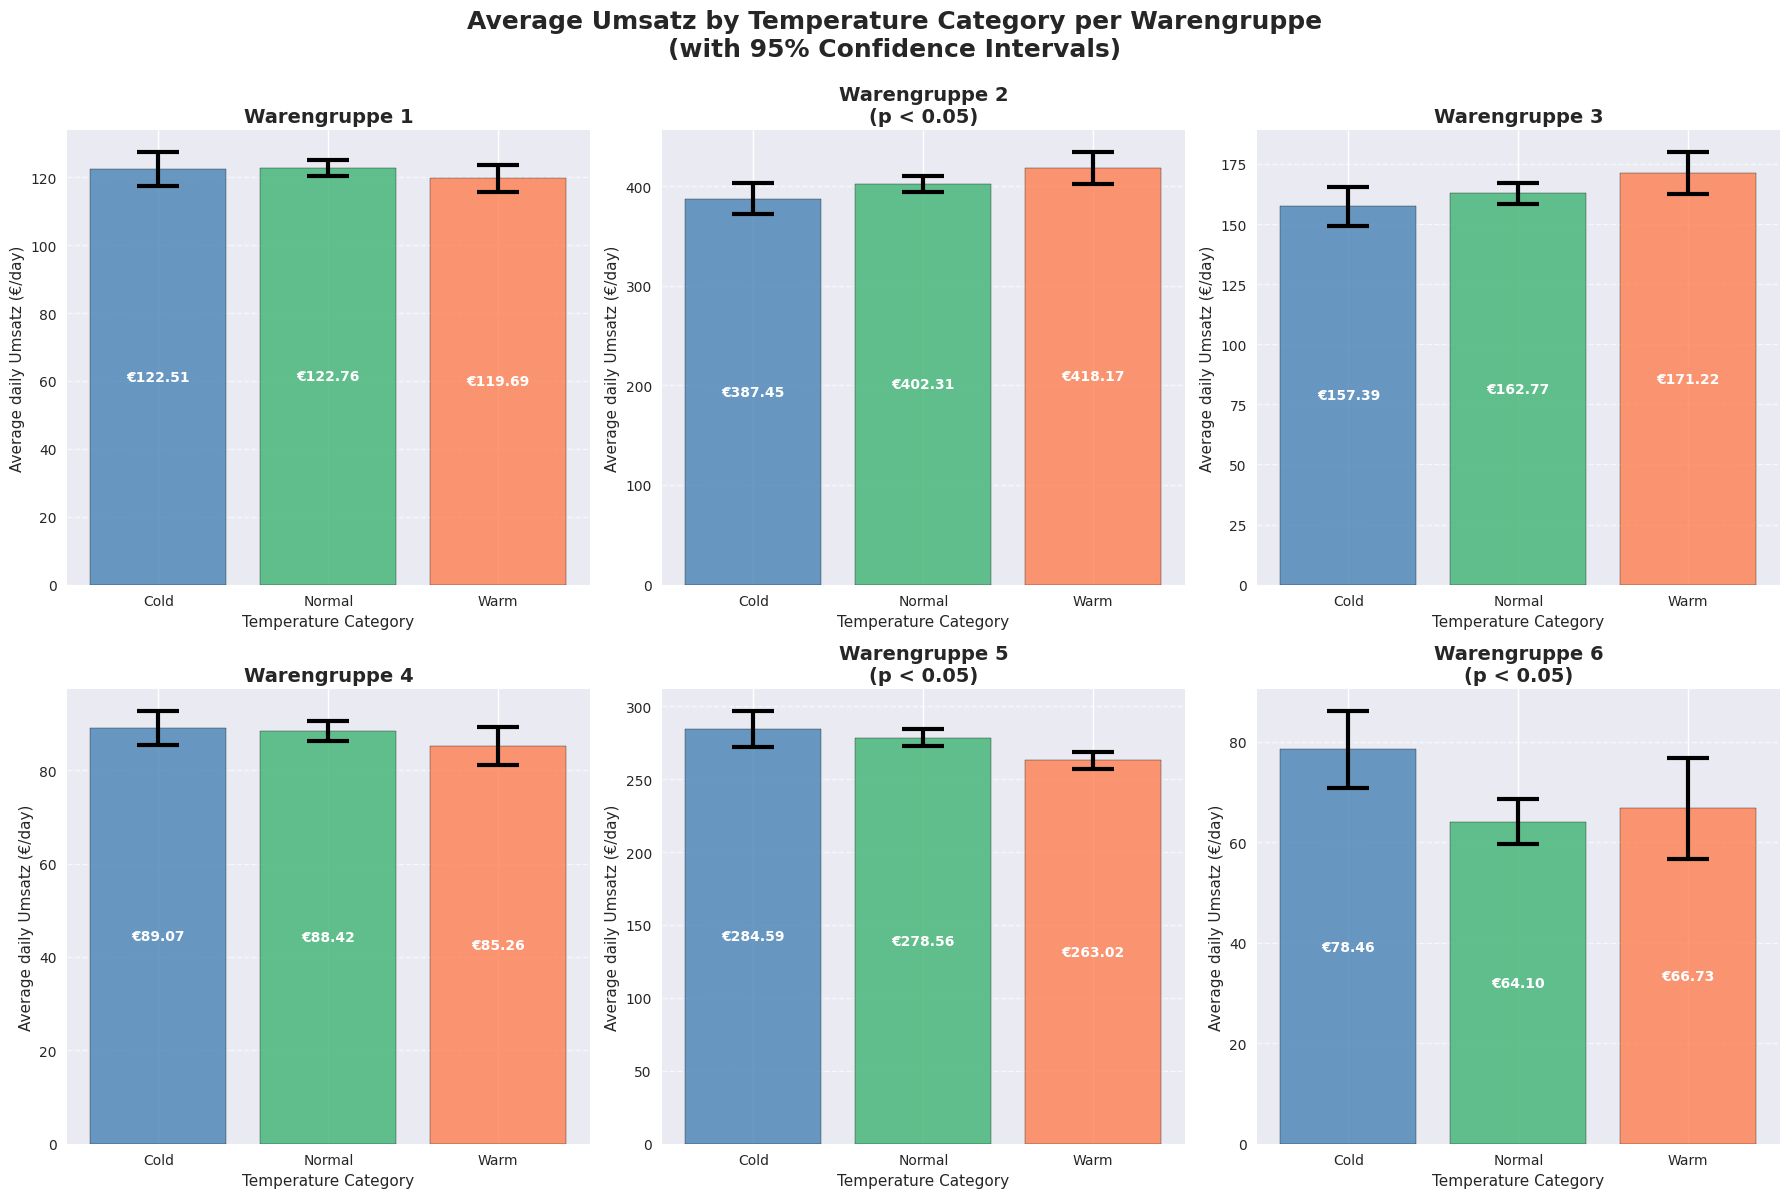


SUMMARY & INTERPRETATION

✗ Warengruppe 1.0: No significant temperature effect (p=0.4615)

✓ Warengruppe 2.0: Temperature significantly influences Umsatz (p=0.0166)
  Significant differences found between: Cold vs Warm

✗ Warengruppe 3.0: No significant temperature effect (p=0.0540)

✗ Warengruppe 4.0: No significant temperature effect (p=0.2958)

✓ Warengruppe 5.0: Temperature significantly influences Umsatz (p=0.0115)
  Significant differences found between: Cold vs Warm, Normal vs Warm

✓ Warengruppe 6.0: Temperature significantly influences Umsatz (p=0.0241)
  Significant differences found between: Cold vs Normal



In [38]:
import numpy as np
from scipy import stats

print("--- Analyzing Average Umsatz by Temperature Categories per Warengruppe ---")
print("--- with Confidence Intervals and Statistical Significance ---")

# Get unique Warengruppen
warengruppen = df_imputed['Warengruppe'].unique()
print(f"\nFound {len(warengruppen)} Warengruppen: {sorted(warengruppen)}")

# Calculate average Umsatz, confidence intervals, and perform statistical tests
results = []
statistical_tests = []

for wg in sorted(warengruppen):
    wg_data = df_imputed[df_imputed['Warengruppe'] == wg]
    
    # Get data for each temperature category and drop NaN values
    umsatz_kalt = wg_data[wg_data['Temperatur_kalt'] == 1]['Umsatz'].dropna()
    umsatz_normal = wg_data[wg_data['Temperatur_normal'] == 1]['Umsatz'].dropna()
    umsatz_warm = wg_data[wg_data['Temperatur_warm'] == 1]['Umsatz'].dropna()
    
    # Calculate means
    avg_kalt = umsatz_kalt.mean()
    avg_normal = umsatz_normal.mean()
    avg_warm = umsatz_warm.mean()
    
    # Calculate 95% confidence intervals (handle NaN values)
    if len(umsatz_kalt) > 1 and not np.isnan(avg_kalt):
        sem_kalt = stats.sem(umsatz_kalt)
        ci_kalt = stats.t.interval(0.95, len(umsatz_kalt)-1, loc=avg_kalt, scale=sem_kalt)
    else:
        ci_kalt = (avg_kalt, avg_kalt)
    
    if len(umsatz_normal) > 1 and not np.isnan(avg_normal):
        sem_normal = stats.sem(umsatz_normal)
        ci_normal = stats.t.interval(0.95, len(umsatz_normal)-1, loc=avg_normal, scale=sem_normal)
    else:
        ci_normal = (avg_normal, avg_normal)
    
    if len(umsatz_warm) > 1 and not np.isnan(avg_warm):
        sem_warm = stats.sem(umsatz_warm)
        ci_warm = stats.t.interval(0.95, len(umsatz_warm)-1, loc=avg_warm, scale=sem_warm)
    else:
        ci_warm = (avg_warm, avg_warm)
    
    results.append({
        'Warengruppe': wg,
        'Cold': avg_kalt,
        'Normal': avg_normal,
        'Warm': avg_warm,
        'Cold_CI': ci_kalt,
        'Normal_CI': ci_normal,
        'Warm_CI': ci_warm,
        'Cold_n': len(umsatz_kalt),
        'Normal_n': len(umsatz_normal),
        'Warm_n': len(umsatz_warm)
    })
    
    # Perform ANOVA test (tests if there's a significant difference between groups)
    if len(umsatz_kalt) > 0 and len(umsatz_normal) > 0 and len(umsatz_warm) > 0:
        f_stat, p_value = stats.f_oneway(umsatz_kalt, umsatz_normal, umsatz_warm)
        
        # Perform pairwise t-tests
        t_kalt_normal, p_kalt_normal = stats.ttest_ind(umsatz_kalt, umsatz_normal)
        t_kalt_warm, p_kalt_warm = stats.ttest_ind(umsatz_kalt, umsatz_warm)
        t_normal_warm, p_normal_warm = stats.ttest_ind(umsatz_normal, umsatz_warm)
        
        statistical_tests.append({
            'Warengruppe': wg,
            'ANOVA_F': f_stat,
            'ANOVA_p': p_value,
            'p_Cold_vs_Normal': p_kalt_normal,
            'p_Cold_vs_Warm': p_kalt_warm,
            'p_Normal_vs_Warm': p_normal_warm
        })

# Print statistics with confidence intervals
print("\n" + "="*80)
print("AVERAGE UMSATZ BY TEMPERATURE CATEGORY PER WARENGRUPPE")
print("="*80)
for r in results:
    print(f"\n{'─'*80}")
    print(f"Warengruppe {r['Warengruppe']}")
    print(f"{'─'*80}")
    print(f"  Cold Temperature:")
    print(f"    Mean: €{r['Cold']:,.2f}")
    print(f"    95% CI: [€{r['Cold_CI'][0]:,.2f}, €{r['Cold_CI'][1]:,.2f}]")
    print(f"    n = {r['Cold_n']}")
    print(f"\n  Normal Temperature:")
    print(f"    Mean: €{r['Normal']:,.2f}")
    print(f"    95% CI: [€{r['Normal_CI'][0]:,.2f}, €{r['Normal_CI'][1]:,.2f}]")
    print(f"    n = {r['Normal_n']}")
    print(f"\n  Warm Temperature:")
    print(f"    Mean: €{r['Warm']:,.2f}")
    print(f"    95% CI: [€{r['Warm_CI'][0]:,.2f}, €{r['Warm_CI'][1]:,.2f}]")
    print(f"    n = {r['Warm_n']}")

# Print statistical significance tests
print("\n" + "="*80)
print("STATISTICAL SIGNIFICANCE TESTS")
print("="*80)
for test in statistical_tests:
    print(f"\n{'─'*80}")
    print(f"Warengruppe {test['Warengruppe']}")
    print(f"{'─'*80}")
    print(f"  ANOVA Test (Overall difference between temperature categories):")
    print(f"    F-statistic: {test['ANOVA_F']:.4f}")
    print(f"    p-value: {test['ANOVA_p']:.4f}")
    if test['ANOVA_p'] < 0.05:
        print(f"    *** SIGNIFICANT: Temperature has a significant effect on Umsatz (p < 0.05) ***")
    else:
        print(f"    NOT SIGNIFICANT: No significant temperature effect detected (p >= 0.05)")
    
    print(f"\n  Pairwise Comparisons (t-tests):")
    print(f"    Cold vs Normal:  p = {test['p_Cold_vs_Normal']:.4f} {'***' if test['p_Cold_vs_Normal'] < 0.05 else '(n.s.)'}")
    print(f"    Cold vs Warm:    p = {test['p_Cold_vs_Warm']:.4f} {'***' if test['p_Cold_vs_Warm'] < 0.05 else '(n.s.)'}")
    print(f"    Normal vs Warm:  p = {test['p_Normal_vs_Warm']:.4f} {'***' if test['p_Normal_vs_Warm'] < 0.05 else '(n.s.)'}")
    print(f"    (*** indicates p < 0.05, n.s. = not significant)")

# Create bar charts with confidence intervals
# Filter to only show Warengruppen 1-6 (exclude 'nan')
results_filtered = [r for r in results if not np.isnan(r['Warengruppe']) and r['Warengruppe'] <= 6]
statistical_tests_filtered = [t for t in statistical_tests if not np.isnan(t['Warengruppe']) and t['Warengruppe'] <= 6]

n_warengruppen = len(results_filtered)

# Arrange in 2 rows x 3 columns for presentation
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()  # Flatten to make indexing easier

categories = ['Cold', 'Normal', 'Warm']
colors_temp = ['steelblue', 'mediumseagreen', 'coral']

print("\nDebug: Error bar sizes:")
for r in results_filtered:
    errors = [
        (r['Cold_CI'][1] - r['Cold_CI'][0]) / 2,
        (r['Normal_CI'][1] - r['Normal_CI'][0]) / 2,
        (r['Warm_CI'][1] - r['Warm_CI'][0]) / 2
    ]
    print(f"Warengruppe {r['Warengruppe']}: Cold={errors[0]:.2f}, Normal={errors[1]:.2f}, Warm={errors[2]:.2f}")

for idx, (ax, r) in enumerate(zip(axes[:n_warengruppen], results_filtered)):
    values = [r['Cold'], r['Normal'], r['Warm']]
    
    # Calculate error bars (half of CI width)
    errors = [
        (r['Cold_CI'][1] - r['Cold_CI'][0]) / 2,
        (r['Normal_CI'][1] - r['Normal_CI'][0]) / 2,
        (r['Warm_CI'][1] - r['Warm_CI'][0]) / 2
    ]
    
    # Create bars with error bars
    bars = ax.bar(categories, values, color=colors_temp, edgecolor='black', 
                   alpha=0.8, yerr=errors, capsize=15, 
                   error_kw={'linewidth': 3, 'ecolor': 'black', 'capthick': 3})
    
    # Styling
    wg_title = f'Warengruppe {int(r["Warengruppe"])}'
    # Add significance indicator if ANOVA is significant
    test_result = next((t for t in statistical_tests_filtered if t['Warengruppe'] == r['Warengruppe']), None)
    if test_result and test_result['ANOVA_p'] < 0.05:
        wg_title += '\n(p < 0.05)'
    
    ax.set_title(wg_title, fontsize=14, fontweight='bold')
    ax.set_xlabel('Temperature Category', fontsize=11)
    ax.set_ylabel('Average daily Umsatz (€/day)', fontsize=11)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Add value labels in the middle of bars
    for i, (bar, value) in enumerate(zip(bars, values)):
        height = bar.get_height()
        # Place text in the middle of the bar
        ax.text(bar.get_x() + bar.get_width()/2., height / 2,
                f'€{value:,.2f}',
                ha='center', va='center', fontsize=10, fontweight='bold', color='white')

# Hide any unused subplots
for idx in range(n_warengruppen, 6):
    axes[idx].axis('off')

plt.suptitle('Average Umsatz by Temperature Category per Warengruppe\n(with 95% Confidence Intervals)', 
             fontsize=18, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

# Summary interpretation
print("\n" + "="*80)
print("SUMMARY & INTERPRETATION")
print("="*80)
for test in statistical_tests:
    wg = test['Warengruppe']
    if test['ANOVA_p'] < 0.05:
        print(f"\n✓ Warengruppe {wg}: Temperature significantly influences Umsatz (p={test['ANOVA_p']:.4f})")
        sig_pairs = []
        if test['p_Cold_vs_Normal'] < 0.05:
            sig_pairs.append("Cold vs Normal")
        if test['p_Cold_vs_Warm'] < 0.05:
            sig_pairs.append("Cold vs Warm")
        if test['p_Normal_vs_Warm'] < 0.05:
            sig_pairs.append("Normal vs Warm")
        if sig_pairs:
            print(f"  Significant differences found between: {', '.join(sig_pairs)}")
    else:
        print(f"\n✗ Warengruppe {wg}: No significant temperature effect (p={test['ANOVA_p']:.4f})")

print("\n" + "="*80)


--- Analyzing Average Umsatz by Niederschlag Categories per Warengruppe ---
--- with Confidence Intervals and Statistical Significance ---

Found 7 Warengruppen: [np.float64(1.0), np.float64(2.0), np.float64(3.0), np.float64(4.0), np.float64(5.0), np.float64(6.0), np.float64(nan)]

AVERAGE UMSATZ BY NIEDERSCHLAG CATEGORY PER WARENGRUPPE

────────────────────────────────────────────────────────────────────────────────
Warengruppe 1.0
────────────────────────────────────────────────────────────────────────────────
  Wet (Niederschlag_nass):
    Mean: €120.78
    95% CI: [€118.08, €123.49]
    n = 950

  Dry (Niederschlag_trocken):
    Mean: €123.63
    95% CI: [€121.12, €126.14]
    n = 869

────────────────────────────────────────────────────────────────────────────────
Warengruppe 2.0
────────────────────────────────────────────────────────────────────────────────
  Wet (Niederschlag_nass):
    Mean: €393.49
    95% CI: [€384.68, €402.31]
    n = 950

  Dry (Niederschlag_trocken):
    

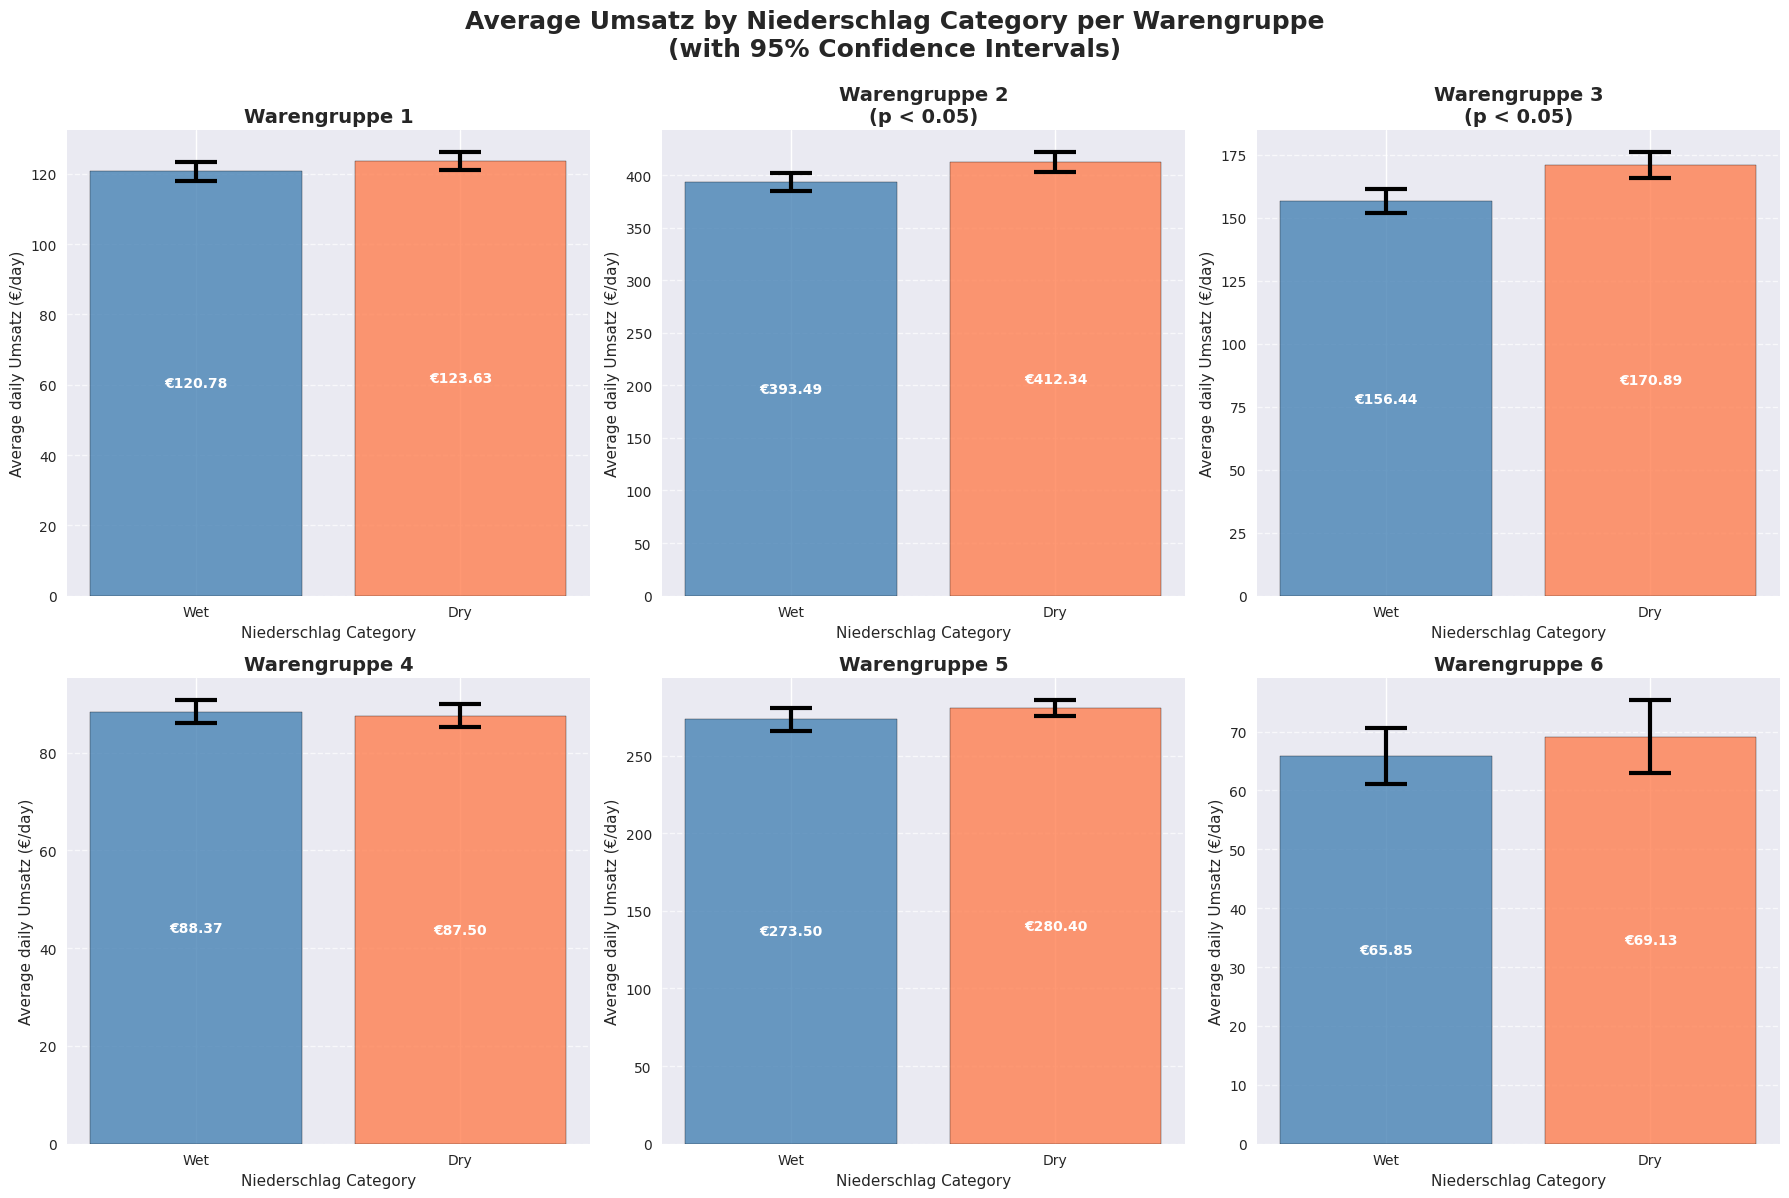


SUMMARY & INTERPRETATION

✗ Warengruppe 1.0: No significant Niederschlag effect (p=0.1327)

✓ Warengruppe 2.0: Niederschlag significantly influences Umsatz (p=0.0040)

✓ Warengruppe 3.0: Niederschlag significantly influences Umsatz (p=0.0000)

✗ Warengruppe 4.0: No significant Niederschlag effect (p=0.6047)

✗ Warengruppe 5.0: No significant Niederschlag effect (p=0.1399)

✗ Warengruppe 6.0: No significant Niederschlag effect (p=0.4190)



In [39]:
import numpy as np
from scipy import stats

print("--- Analyzing Average Umsatz by Niederschlag Categories per Warengruppe ---")
print("--- with Confidence Intervals and Statistical Significance ---")

# Get unique Warengruppen
warengruppen = df_imputed['Warengruppe'].unique()
print(f"\nFound {len(warengruppen)} Warengruppen: {sorted(warengruppen)}")

# Calculate average Umsatz, confidence intervals, and perform statistical tests
results = []
statistical_tests = []

for wg in sorted(warengruppen):
    wg_data = df_imputed[df_imputed['Warengruppe'] == wg]
    
    # Get data for each Niederschlag category and drop NaN values
    umsatz_nass = wg_data[wg_data['Niederschlag_nass'] == 1]['Umsatz'].dropna()
    umsatz_trocken = wg_data[wg_data['Niederschlag_trocken'] == 1]['Umsatz'].dropna()
    
    # Calculate means
    avg_nass = umsatz_nass.mean()
    avg_trocken = umsatz_trocken.mean()
    
    # Calculate 95% confidence intervals (handle NaN values)
    if len(umsatz_nass) > 1 and not np.isnan(avg_nass):
        sem_nass = stats.sem(umsatz_nass)
        ci_nass = stats.t.interval(0.95, len(umsatz_nass)-1, loc=avg_nass, scale=sem_nass)
    else:
        ci_nass = (avg_nass, avg_nass)
    
    if len(umsatz_trocken) > 1 and not np.isnan(avg_trocken):
        sem_trocken = stats.sem(umsatz_trocken)
        ci_trocken = stats.t.interval(0.95, len(umsatz_trocken)-1, loc=avg_trocken, scale=sem_trocken)
    else:
        ci_trocken = (avg_trocken, avg_trocken)
    
    results.append({
        'Warengruppe': wg,
        'Nass': avg_nass,
        'Trocken': avg_trocken,
        'Nass_CI': ci_nass,
        'Trocken_CI': ci_trocken,
        'Nass_n': len(umsatz_nass),
        'Trocken_n': len(umsatz_trocken)
    })
    
    # Perform t-test (tests if there's a significant difference between the two groups)
    if len(umsatz_nass) > 0 and len(umsatz_trocken) > 0:
        t_stat, p_value = stats.ttest_ind(umsatz_nass, umsatz_trocken)
        
        statistical_tests.append({
            'Warengruppe': wg,
            't_statistic': t_stat,
            'p_value': p_value
        })

# Print statistics with confidence intervals
print("\n" + "="*80)
print("AVERAGE UMSATZ BY NIEDERSCHLAG CATEGORY PER WARENGRUPPE")
print("="*80)
for r in results:
    print(f"\n{'─'*80}")
    print(f"Warengruppe {r['Warengruppe']}")
    print(f"{'─'*80}")
    print(f"  Wet (Niederschlag_nass):")
    print(f"    Mean: €{r['Nass']:,.2f}")
    print(f"    95% CI: [€{r['Nass_CI'][0]:,.2f}, €{r['Nass_CI'][1]:,.2f}]")
    print(f"    n = {r['Nass_n']}")
    print(f"\n  Dry (Niederschlag_trocken):")
    print(f"    Mean: €{r['Trocken']:,.2f}")
    print(f"    95% CI: [€{r['Trocken_CI'][0]:,.2f}, €{r['Trocken_CI'][1]:,.2f}]")
    print(f"    n = {r['Trocken_n']}")

# Print statistical significance tests
print("\n" + "="*80)
print("STATISTICAL SIGNIFICANCE TESTS")
print("="*80)
for test in statistical_tests:
    print(f"\n{'─'*80}")
    print(f"Warengruppe {test['Warengruppe']}")
    print(f"{'─'*80}")
    print(f"  t-test (Wet vs Dry):")
    print(f"    t-statistic: {test['t_statistic']:.4f}")
    print(f"    p-value: {test['p_value']:.4f}")
    if test['p_value'] < 0.05:
        print(f"    *** SIGNIFICANT: Niederschlag has a significant effect on Umsatz (p < 0.05) ***")
    else:
        print(f"    NOT SIGNIFICANT: No significant Niederschlag effect detected (p >= 0.05)")

# Create bar charts with confidence intervals
# Filter to only show Warengruppen 1-6 (exclude 'nan')
results_filtered = [r for r in results if not np.isnan(r['Warengruppe']) and r['Warengruppe'] <= 6]
statistical_tests_filtered = [t for t in statistical_tests if not np.isnan(t['Warengruppe']) and t['Warengruppe'] <= 6]

n_warengruppen = len(results_filtered)

# Arrange in 2 rows x 3 columns for presentation
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()  # Flatten to make indexing easier

categories = ['Wet', 'Dry']
colors_niederschlag = ['steelblue', 'coral']

print("\nDebug: Error bar sizes:")
for r in results_filtered:
    errors = [
        (r['Nass_CI'][1] - r['Nass_CI'][0]) / 2,
        (r['Trocken_CI'][1] - r['Trocken_CI'][0]) / 2
    ]
    print(f"Warengruppe {r['Warengruppe']}: Wet={errors[0]:.2f}, Dry={errors[1]:.2f}")

for idx, (ax, r) in enumerate(zip(axes[:n_warengruppen], results_filtered)):
    values = [r['Nass'], r['Trocken']]
    
    # Calculate error bars (half of CI width)
    errors = [
        (r['Nass_CI'][1] - r['Nass_CI'][0]) / 2,
        (r['Trocken_CI'][1] - r['Trocken_CI'][0]) / 2
    ]
    
    # Create bars with error bars
    bars = ax.bar(categories, values, color=colors_niederschlag, edgecolor='black', 
                   alpha=0.8, yerr=errors, capsize=15, 
                   error_kw={'linewidth': 3, 'ecolor': 'black', 'capthick': 3})
    
    # Styling
    wg_title = f'Warengruppe {int(r["Warengruppe"])}'
    # Add significance indicator if t-test is significant
    test_result = next((t for t in statistical_tests_filtered if t['Warengruppe'] == r['Warengruppe']), None)
    if test_result and test_result['p_value'] < 0.05:
        wg_title += '\n(p < 0.05)'
    
    ax.set_title(wg_title, fontsize=14, fontweight='bold')
    ax.set_xlabel('Niederschlag Category', fontsize=11)
    ax.set_ylabel('Average daily Umsatz (€/day)', fontsize=11)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Add value labels in the middle of bars
    for i, (bar, value) in enumerate(zip(bars, values)):
        height = bar.get_height()
        # Place text in the middle of the bar
        ax.text(bar.get_x() + bar.get_width()/2., height / 2,
                f'€{value:,.2f}',
                ha='center', va='center', fontsize=10, fontweight='bold', color='white')

# Hide any unused subplots
for idx in range(n_warengruppen, 6):
    axes[idx].axis('off')

plt.suptitle('Average Umsatz by Niederschlag Category per Warengruppe\n(with 95% Confidence Intervals)', 
             fontsize=18, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

# Summary interpretation
print("\n" + "="*80)
print("SUMMARY & INTERPRETATION")
print("="*80)
for test in statistical_tests:
    wg = test['Warengruppe']
    if test['p_value'] < 0.05:
        print(f"\n✓ Warengruppe {wg}: Niederschlag significantly influences Umsatz (p={test['p_value']:.4f})")
    else:
        print(f"\n✗ Warengruppe {wg}: No significant Niederschlag effect (p={test['p_value']:.4f})")

print("\n" + "="*80)